# Week 3

## Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'x': [60, 7, 3, 38, 13, 30, 39, 33, 51, 77, 79, 31, 34, 48, 4, 55, 20, 45, 14, 24],
    'y': [30, 40, 52, 18, 38, 37, 62, 68, 72, 59, 17, 41, 29, 4, 57, 61, 12, 56, 63, 79]
})

In [3]:
np.random.seed(200)
k = 3

In [4]:
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

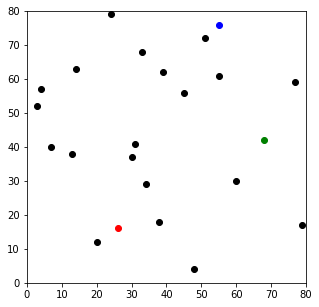

In [5]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [7]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
    

In [8]:
df = assignment(df, centroids)
print(df.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  60  30        36.769553        14.422205        46.270941        2     g
1   7  40        30.610456        61.032778        60.000000        1     r
2   3  52        42.720019        65.764732        57.271284        1     r
3  38  18        12.165525        38.418745        60.440053        1     r
4  13  38        25.553865        55.145263        56.639209        1     r


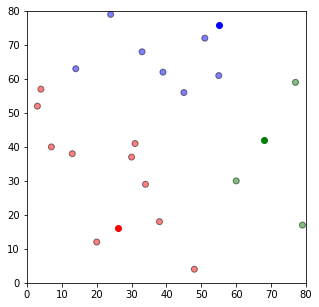

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [10]:
import copy

old_centroids = copy.deepcopy(centroids)

In [11]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [12]:
centroids = update(centroids)

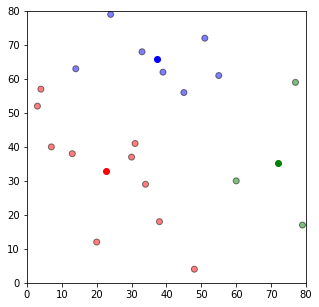

In [14]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

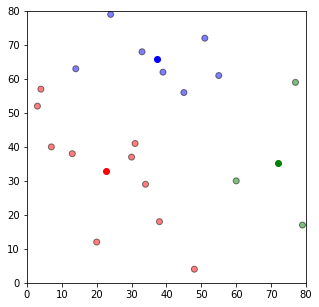

In [15]:
df = assignment(df,centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

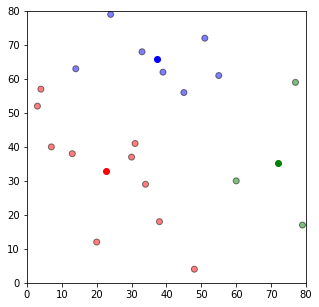

In [16]:
while True:
  closest_centroids = df['closest'].copy(deep = True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

### Using scikit-learn

In [17]:
df = pd.DataFrame({
    'x': [60, 7, 3, 38, 13, 30, 39, 33, 51, 77, 79, 31, 34, 48, 4, 55, 20, 45, 14, 24],
    'y': [30, 40, 52, 18, 38, 37, 62, 68, 72, 59, 17, 41, 29, 4, 57, 61, 12, 56, 63, 79]
})

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [19]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

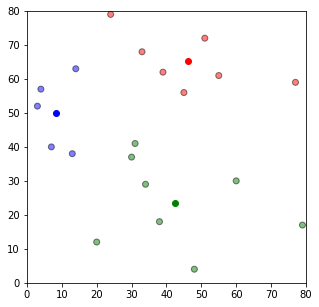

In [20]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'], color=colors1,alpha=0.5, edgecolor='k')
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

## Question 2

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
df = pd.read_csv('Mall_Customers.csv')

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.drop(['CustomerID'], axis=1, inplace=True)

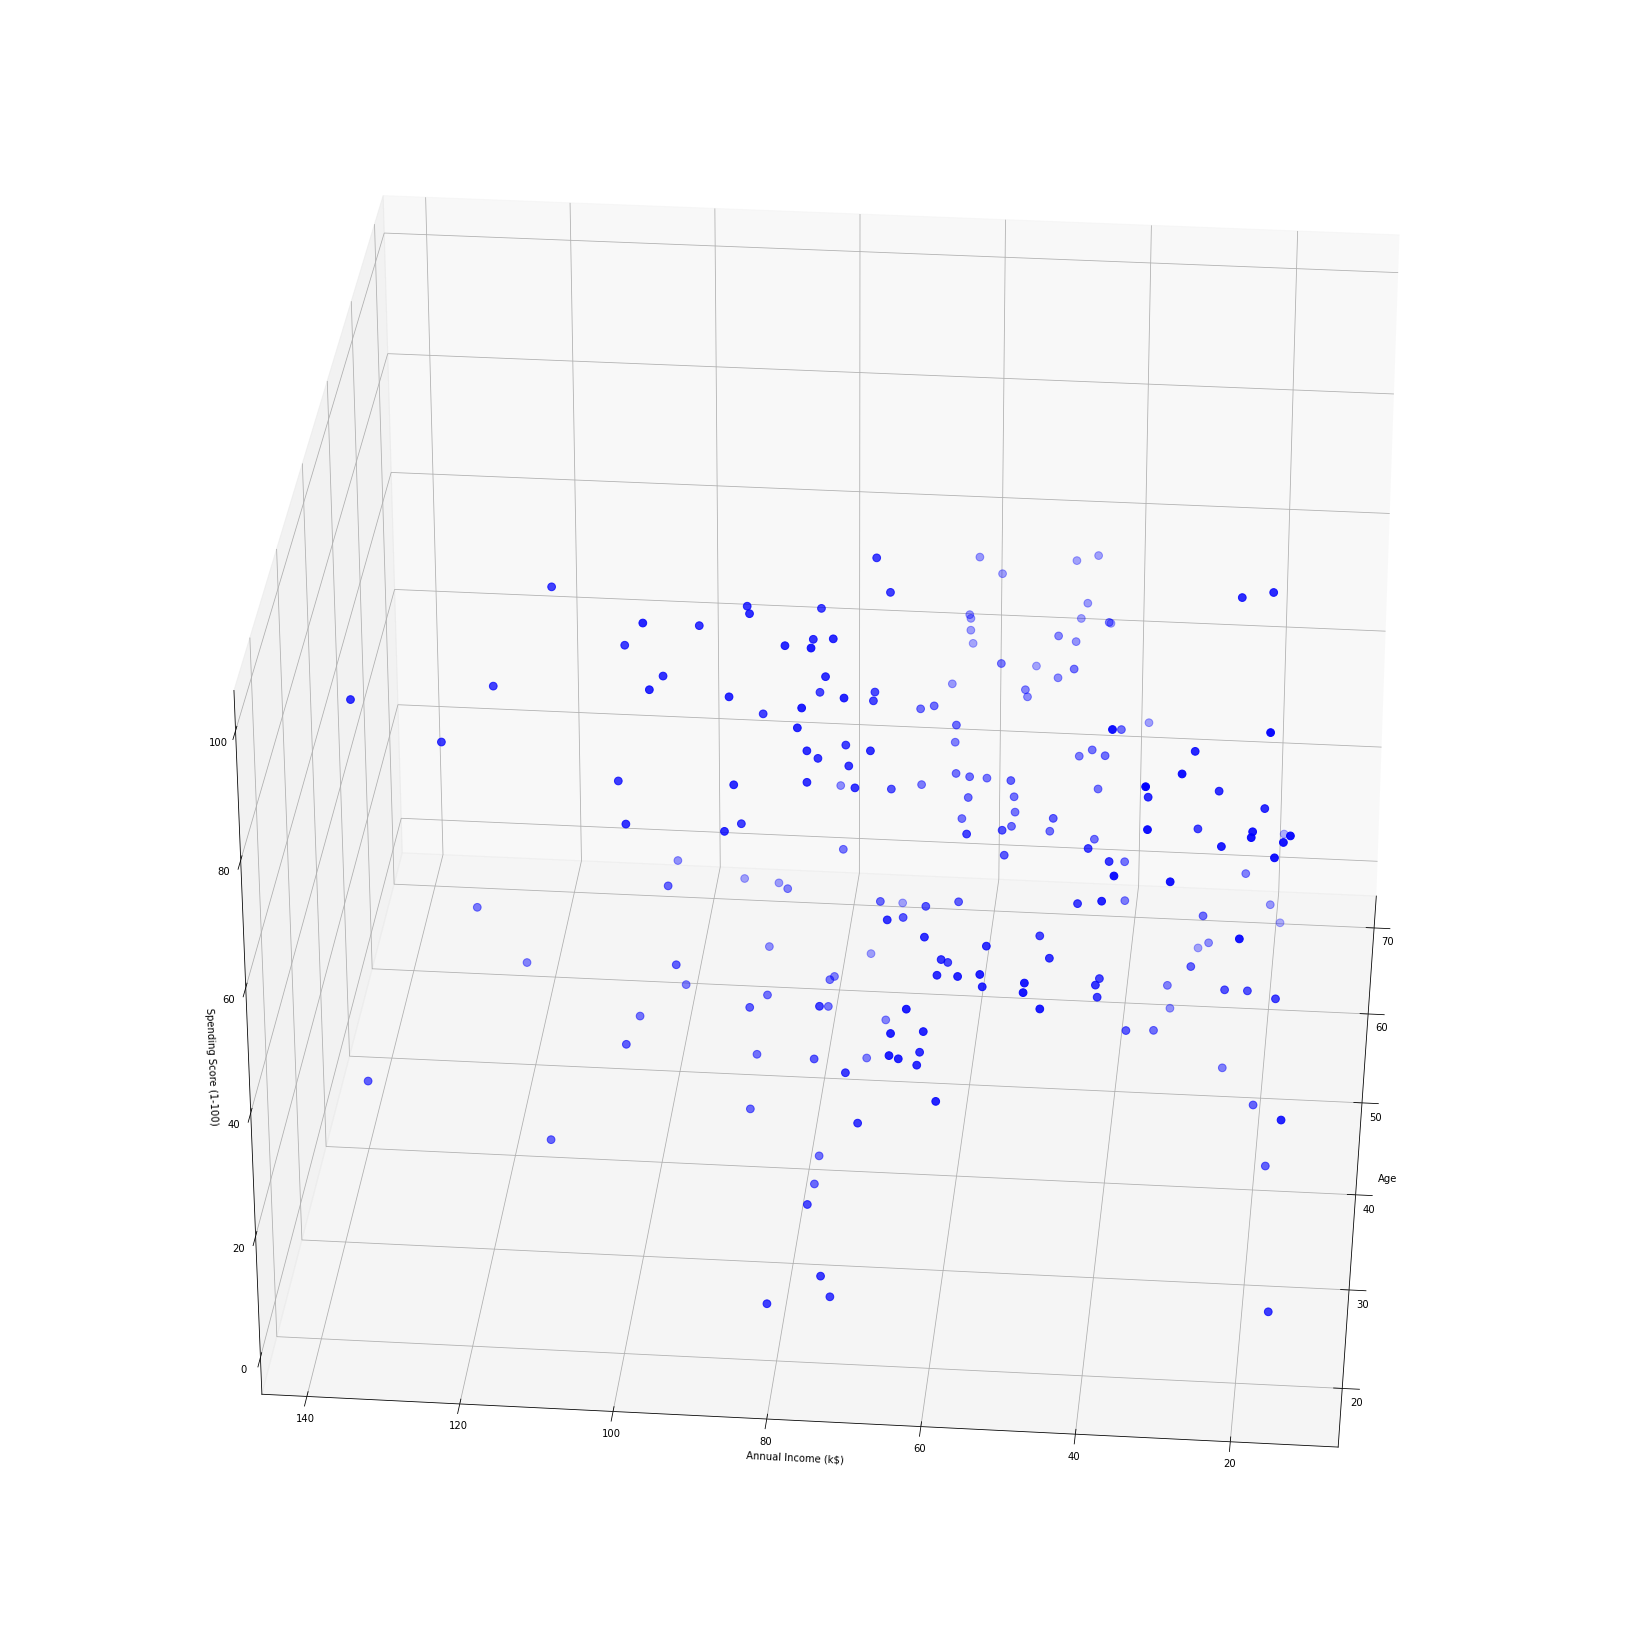

In [25]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', s=60)
ax.view_init(30, 185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df.iloc[:,1:])

In [27]:
df['label'] = clusters

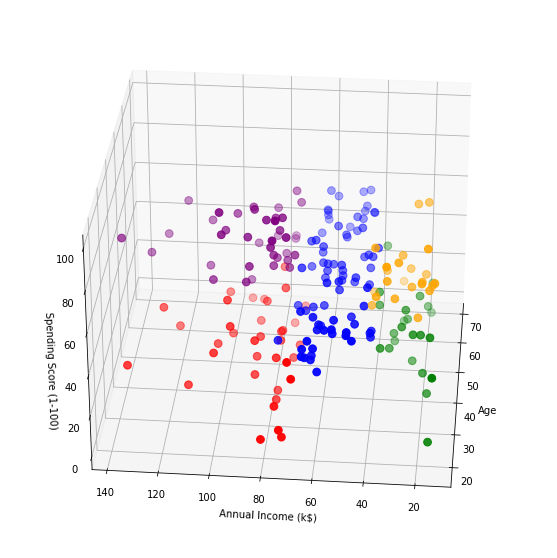

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()